# 1. install required libraries

pip install pandas, scikit-learn, numpy, notebook, graphviz, pydotplus


# 2. import required libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OrdinalEncoder # Import Ordinal Encoder
from sklearn.preprocessing import LabelEncoder # Import Ordinal Encoder

# 3. Load Data

In [2]:
data = pd.read_excel('samples.xlsx', index_col=None)
data.head()

,Tubular glands,Exausted glands,Cystic glands,Breakdown,Predicidua,Variable vacuoles,Rare Mitoses,Surface breakdown,Spindled stroma,Phase
0,False,False,False,False,True,False,True,True,False,Hormonal therapy
1,True,True,False,True,True,True,False,True,False,Late Menstrual
2,False,True,False,True,True,True,False,True,False,Mid-cycle breakdown (follicle dysfunction)
3,False,False,True,False,True,False,True,True,False,Late Menstrual
4,True,False,True,False,False,False,True,False,False,Hormonal therapy


# 4. Label Encoding

In [3]:
data_columns = data.columns
data1 = data.copy()
label_encoder = LabelEncoder()
for column in data_columns:
    data1[column] = label_encoder.fit_transform(data[column])
data1.head()


,Tubular glands,Exausted glands,Cystic glands,Breakdown,Predicidua,Variable vacuoles,Rare Mitoses,Surface breakdown,Spindled stroma,Phase
0,0,0,0,0,1,0,1,1,0,1
1,1,1,0,1,1,1,0,1,0,2
2,0,1,0,1,1,1,0,1,0,3
3,0,0,1,0,1,0,1,1,0,2
4,1,0,1,0,0,0,1,0,0,1


# 5. Feature Selection

In [4]:
X = data1[data_columns[:-1]] # Features
y = data1[data_columns[-1]] # Target variable

# 6. Splitting Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# 7. Building Decision Tree Model

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# 8. Evaluating Model

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2


# 9. Visualizing Decision Trees

In [30]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 2
|   |   |--- feature_7 >  0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  

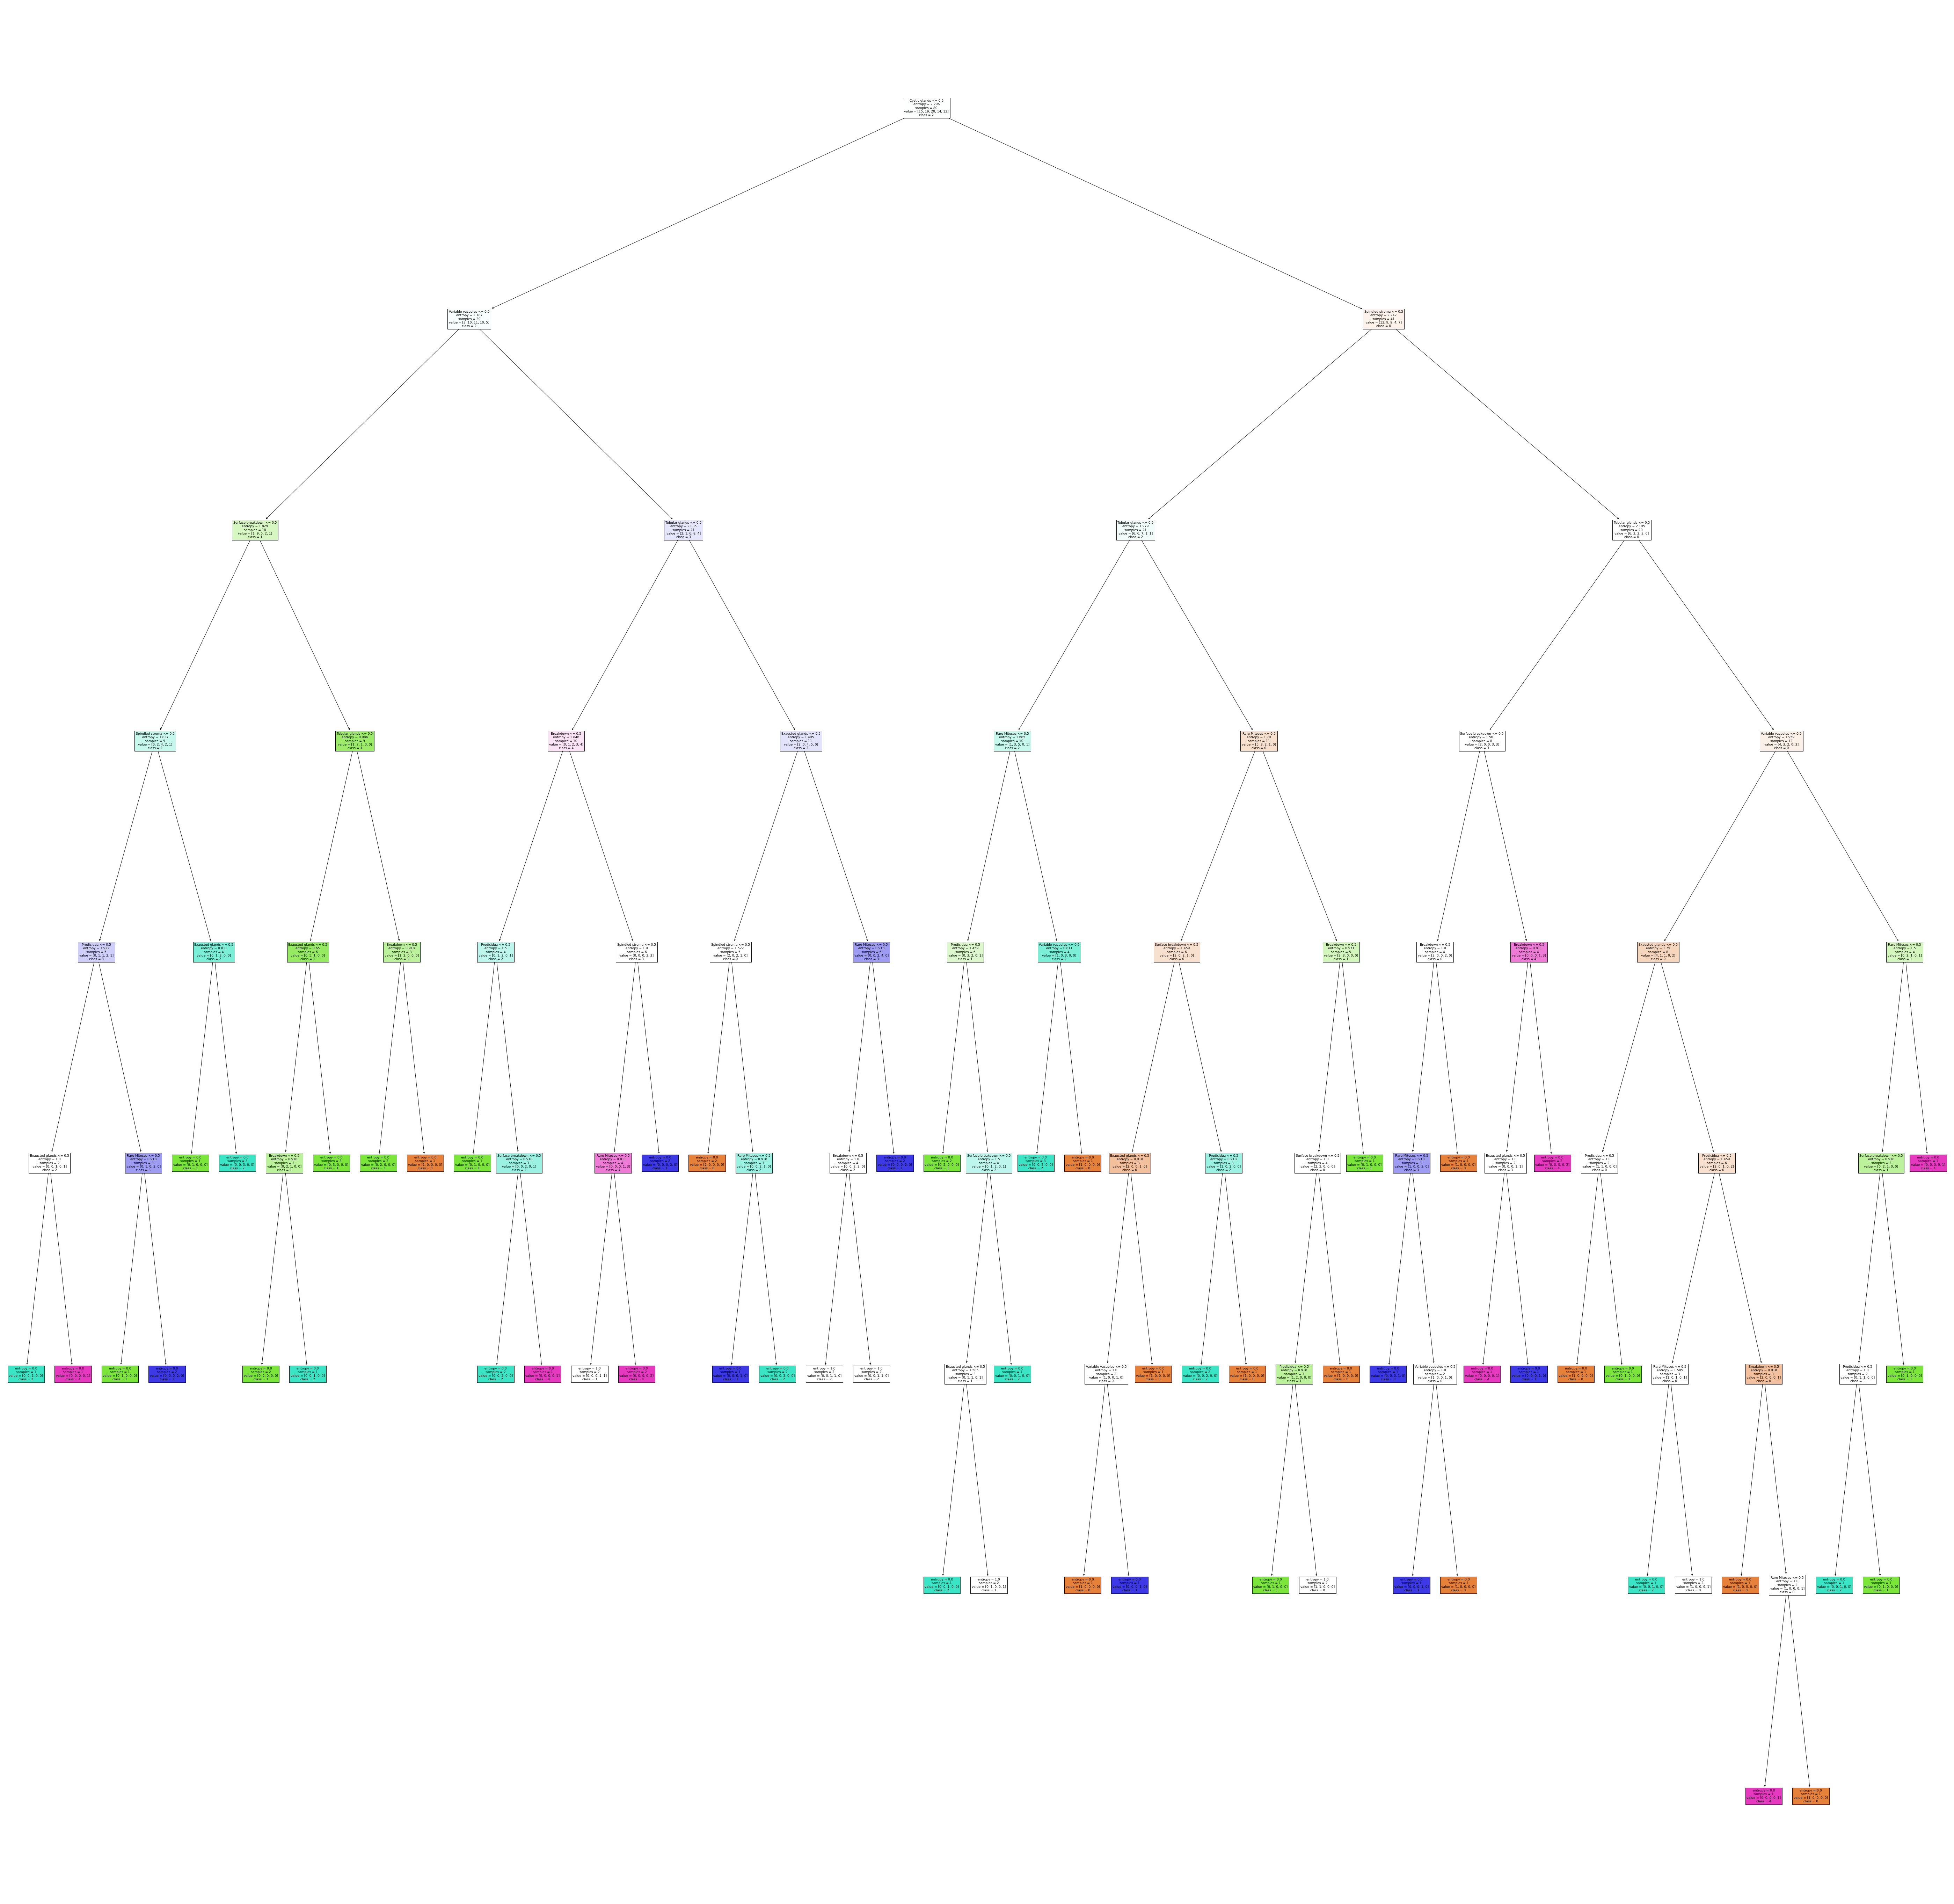

In [38]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, 
                   feature_names=data1.columns[:-1],  
                   class_names=['0', '1', '2', '3', '4'],
                   filled=True)
fig.savefig('temp.png')

In [20]:
# Visualize data
import pydotplus
import collections
dot_data = tree.export_graphviz(clf,
                                feature_names=data1.columns[:-1],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

InvocationException: GraphViz's executables not found